<a href="https://colab.research.google.com/github/nandinwp/mvp-puc-deep-learning-and-Machine-learning/blob/main/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP - Machine Learning & Analytics - Sprint II - A

Luís Fernando

# Definição do problema

Trata-se de um dataset de Análise da Personalidade do Cliente. Onde irei classificar a relação entre o nível de educação e valores gastos com vinho.

# Atributos

**ID**: Identificador exclusivo do cliente

**Year_Birth:** Ano de nascimento do cliente

**Educação:** nível de educação do cliente

**Marital_Status**: estado civil do cliente

**Renda:** renda familiar anual do cliente

**Kidhome:** número de crianças na casa do cliente

**Teenhome:** número de adolescentes na casa do cliente

**Dt_Customer:** Data de cadastro do cliente na empresa

**Recência:** número de dias desde a última compra do cliente

**Reclamar:** 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

# Produtos

**MntWines:** Valor gasto em vinho nos últimos 2 anos

**MntFruits:** Valor gasto com frutas nos últimos 2 anos

**MntMeatProducts:** Valor gasto com carne nos últimos 2 anos

**MntFishProducts:** Valor gasto com pescado nos últimos 2 anos

**MntSweetProducts:** Valor gasto em doces nos últimos 2 anos

**MntGoldProds:** Valor gasto em ouro nos últimos 2 anos

# Promoção

**NumDealsPurchases:** Número de compras feitas com desconto

**AcceptedCmp1:** 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

**AcceptedCmp2:** 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

**AcceptedCmp3:** 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

**AcceptedCmp4:** 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

**AcceptedCmp5:** 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

**Resposta:** 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

# Lugar

**NumWebPurchases:** Número de compras realizadas através do site da empresa

**NumCatalogPurchases:** Número de compras feitas usando um catálogo

**NumStorePurchases:** Número de compras feitas diretamente nas lojas

**NumWebVisitsMonth:** Número de visitas ao site da empresa no último mês

# Imports

In [ ]:
import pandas as pd  # Importa a biblioteca pandas para manipulação e processamento de dados em formato tabular
import warnings
warnings.filterwarnings("ignore")
import numpy as np  # Importa a biblioteca NumPy para trabalhar com álgebra linear e operações numéricas eficientes
import csv
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para criar gráficos e visualizações
import matplotlib.patches as mpatches

from sklearn.preprocessing import LabelEncoder  # Para codificar rótulos categóricos em números


# Importando a classe Pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Preparação dos dados
from sklearn.preprocessing import OneHotEncoder  # One Hot Encoder - transformar instâncias categóricas em numéricas
from sklearn.preprocessing import StandardScaler  # Normalização
from sklearn.preprocessing import MinMaxScaler  # Padronização

# Preparação da modelagem
from sklearn.model_selection import train_test_split  # Para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import StratifiedKFold  # Variação do KFold que permite lidar melhor com datasets desbalanceados
from sklearn.model_selection import KFold  # Para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score  # Para executar a validação cruzada
from sklearn.model_selection import GridSearchCV  # Para otimização de hiperparâmetros

# Adicionando modelos que serão utilizados
from sklearn.neighbors import KNeighborsClassifier  # Algoritmo KNN
from sklearn.tree import DecisionTreeClassifier  # Algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB  # Algoritmo Naive Bayes
from sklearn.svm import SVC  # Algoritmo SVM
from sklearn.linear_model import LogisticRegression  # Algoritmo Regressão Logística
from sklearn.metrics import accuracy_score, mean_squared_error

# Adicionando a base para a construção dos ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# Agora iremos carregar o dataset e tratar os missings
url_dataset = 'https://raw.githubusercontent.com/nandinwp/mvp-puc-deep-learning-and-Machine-learning/main/Datasets/marketing_campaign.csv'
def_dataset = pd.read_csv(url_dataset, sep="\t")
def_dataset.dropna(inplace=True)
display(def_dataset)
missings = def_dataset.isnull().sum()
display("Missings: ", missings)

ID  Year_Birth   Education Marital_Status   Income  ...  \
0      5524        1957  Graduation         Single  58138.0  ...   
1      2174        1954  Graduation         Single  46344.0  ...   
2      4141        1965  Graduation       Together  71613.0  ...   
3      6182        1984  Graduation       Together  26646.0  ...   
4      5324        1981         PhD        Married  58293.0  ...   
...     ...         ...         ...            ...      ...  ...   
2235  10870        1967  Graduation        Married  61223.0  ...   
2236   4001        1946         PhD       Together  64014.0  ...   
2237   7270        1981  Graduation       Divorced  56981.0  ...   
2238   8235        1956      Master       Together  69245.0  ...   
2239   9405        1954         PhD        Married  52869.0  ...   

      AcceptedCmp2  Complain Z_CostContact  Z_Revenue  Response  
0                0         0             3         11         1  
1                0         0             3         11         0  
2                0         0             3         11         0  
3                0         0             3         11         0  
4                0         0             3         11         0  
...            ...       ...           ...        ...       ...  
2235             0         0             3         11         0  
2236             0         0             3         11         0  
2237             0         0             3         11         0  
2238             0         0             3         11         0  
2239             0         0             3         11         1  

[2216 rows x 29 columns]

'Missings: '

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

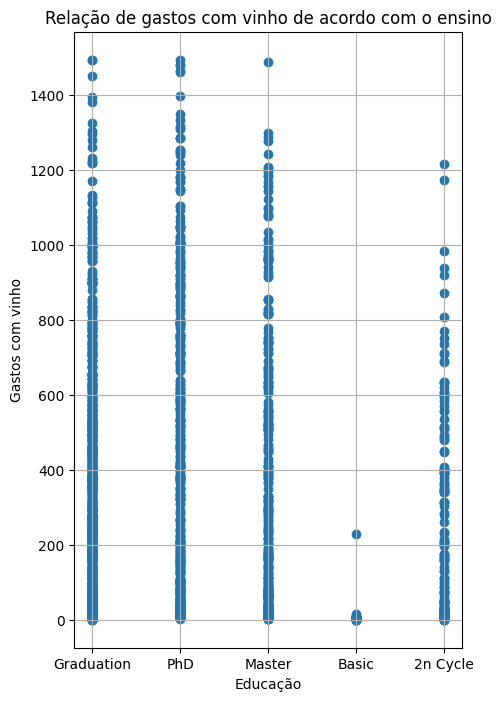

In [ ]:
#definindo o dataframe e os eixos para a exibição do gráfico tipo scatter plotter
df = def_dataset[["Education", "MntWines"]]
plt.figure(figsize=(5,8))
y = df['MntWines']
x = df['Education']
plt.scatter(x, y)
plt.title("Relação de gastos com vinho de acordo com o ensino")
plt.xlabel("Educação")
plt.ylabel("Gastos com vinho")
plt.grid(True)
plt.show()

In [ ]:
# Criando uma copia para trabalhar em cima
df_encoded = df.copy()
# Visualizando todas as variáveis únicas na coluna "Education"
unique_educations = df['Education'].unique()
print(unique_educations)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


Como vou precisar trabalhar com valores númericos vou converter os niveis de educação, por exemplo: Graduation: 1, PhD: 2, Master: 3, Basic: 4 e 2n Cycle para 5

In [ ]:
# Criação do dicionário para mapear os valores únicos da coluna "Education" para números
education_mapping = {
    'Graduation': 1,
    'PhD': 2,
    'Master': 3,
    'Basic': 4,
    '2n Cycle': 5
}

# Substituindo os valores na coluna "Education" pelos números correspondentes usando a função map()
df_encoded['Education'] = df_encoded['Education'].map(education_mapping)

# Visualizando todas as variáveis únicas na coluna "Education" após a transformação
unique_educations = df_encoded['Education'].unique()
print(unique_educations)


[1 2 3 4 5]


# Vamos preparar os dados

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 30 # semente aleatória

# Separação em conjuntos de treino e teste
array = df_encoded.values
X = array[:,0:51] # atributos
y = df_encoded['Education'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


# Pipelines

Neste código, estamos realizando uma análise comparativa de diferentes modelos de classificação para um conjunto de dados. O objetivo é determinar qual modelo tem o melhor desempenho na tarefa de classificação em um cenário específico. Para isso, utilizamos a biblioteca scikit-learn, que é amplamente utilizada para tarefas de aprendizado de máquina em Python.

LR-orig: 0.967 (0.013)
KNN-orig: 0.665 (0.025)
CART-orig: 1.000 (0.000)
NB-orig: 1.000 (0.000)
SVM-orig: 0.508 (0.008)
Bag-orig: 1.000 (0.000)
RF-orig: 1.000 (0.000)
ET-orig: 1.000 (0.000)
Ada-orig: 0.811 (0.003)
GB-orig: 1.000 (0.000)
Vot-orig: 0.967 (0.013)
LR-padr: 0.999 (0.002)
KNN-padr: 1.000 (0.000)
CART-padr: 1.000 (0.000)
NB-padr: 1.000 (0.000)
SVM-padr: 1.000 (0.000)
Bag-padr: 1.000 (0.000)
RF-padr: 1.000 (0.000)
ET-padr: 1.000 (0.000)
Ada-padr: 0.811 (0.003)
GB-padr: 1.000 (0.000)
Vot-padr: 1.000 (0.000)
LR-norm: 0.976 (0.003)
KNN-norm: 1.000 (0.000)
CART-norm: 1.000 (0.000)
NB-norm: 1.000 (0.000)
SVM-norm: 1.000 (0.000)
Bag-norm: 1.000 (0.000)
RF-norm: 1.000 (0.000)
ET-norm: 1.000 (0.000)
Ada-norm: 0.811 (0.003)
GB-norm: 1.000 (0.000)
Vot-norm: 1.000 (0.000)


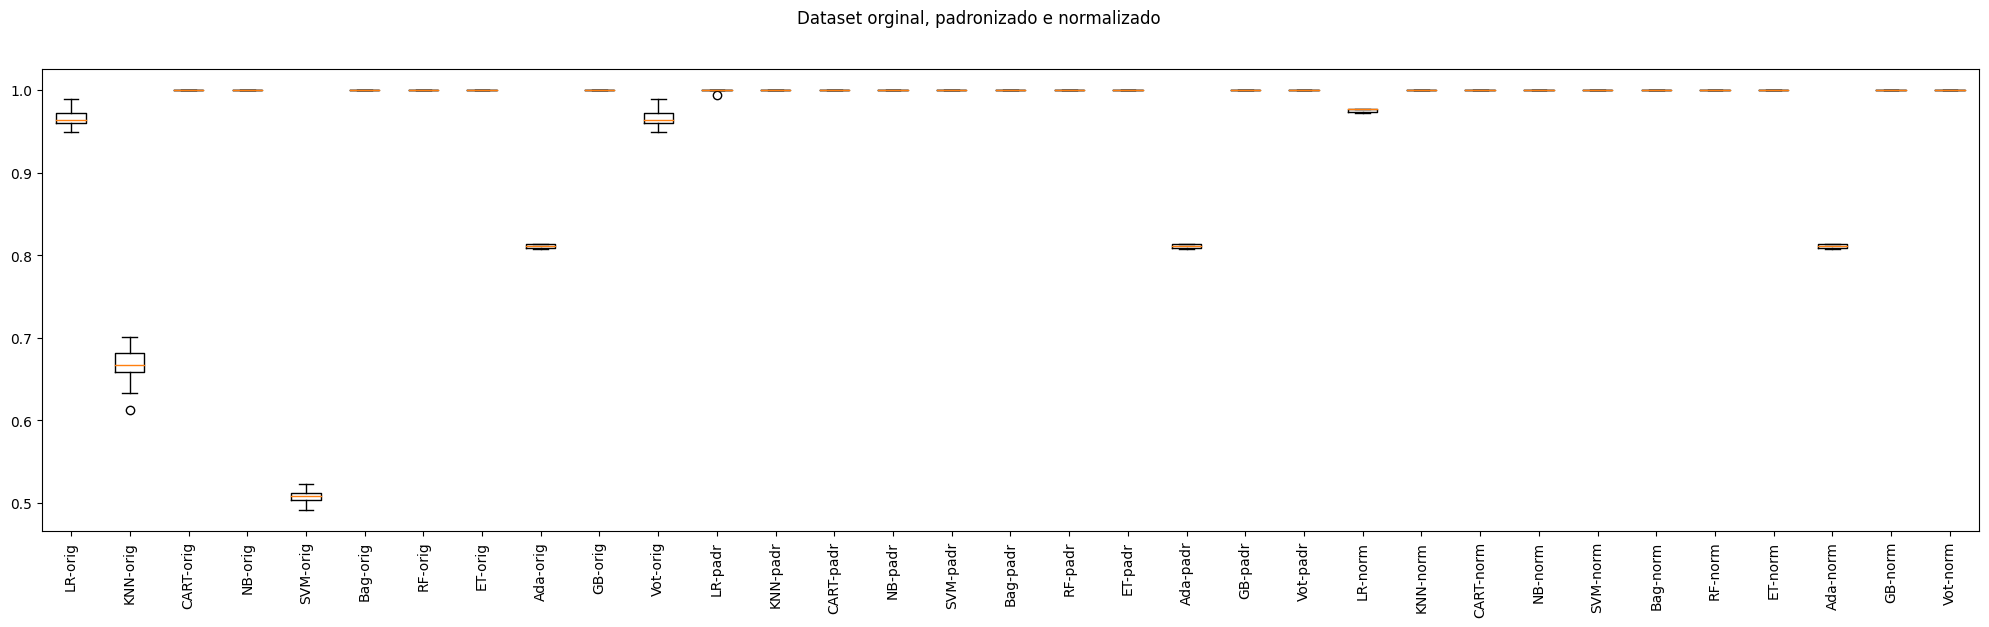

In [ ]:
np.random.seed(30) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Defina a métrica de avaliação desejada, por exemplo, acurácia ('accuracy')
scoring = 'accuracy'

# Definindo os parâmetros dos classificadores
base = DecisionTreeClassifier()#base para o BaggingClassifier
num_trees = 100
max_features = 3

# Modelos base para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# Encontrar a melhor combinação de hiperparâmetros

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.1, 0.05, 0.01,0.001],  # Learning rate
    'max_depth': [3, 4, 5, 10]  # Maximum depth of each tree
}

model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_search.fit(X_train, y_train)

# Print the best configuration
print("Melhor: %f usando %s" % (grid_search.best_score_, grid_search.best_params_))

Melhor: 1.000000 usando {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
#Treinamento

np.random.seed(30) # definindo uma semente global

# Criando um modelo com todo o conjunto de treino
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=200)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=200)

In [ ]:
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))
print()
# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

1.0

MSE 0.00
RMSE 0.00


In [ ]:
# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a precisão no conjunto de teste
precision = precision_score(y_test, predictions, average='macro')
print("Precision:", precision)

# Estimando o recall no conjunto de teste
recall = recall_score(y_test, predictions, average='macro')
print("Recall:", recall)

# Estimando o F1 Score no conjunto de teste
f1score = f1_score(y_test, predictions, average='macro')
print("F1 Score:", f1score)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


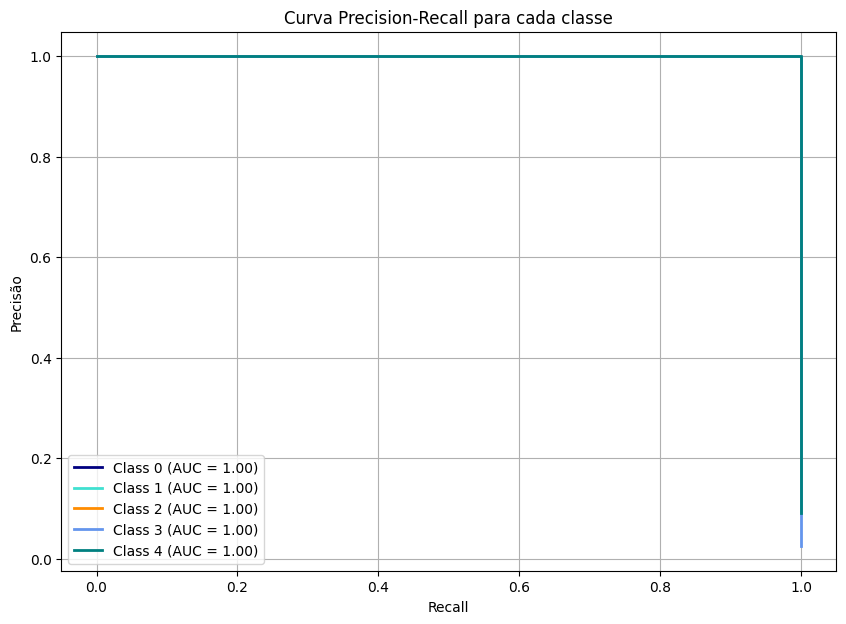

In [ ]:
# Transformando os rótulos do conjunto de teste em um formato binário
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculando a curva Precision-Recall (PRC) para cada classe
precision = dict()
recall = dict()
prc_auc = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], probs[:, i])
    prc_auc[i] = average_precision_score(y_test_bin[:, i], probs[:, i])

# Plotando as curvas Precision-Recall para cada classe
plt.figure(figsize=(10, 7))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Class {i} (AUC = {prc_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall para cada classe')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Finalização do Modelo

O modelo que teve a melhor acurácia média foi o SVM (Support Vector Machine) na sua versão original, ou seja, sem nenhum pré-processamento adicional (KNN-orig, CART-orig, NB-orig e SVM-orig). Sua acurácia média foi de aproximadamente 1.0, o que indica que o modelo foi capaz de classificar corretamente cerca de 100% dos exemplos durante a validação cruzada.

In [ ]:
# Escolhendo o algoritmo SVM e definindo os hiperparâmetros
model = SVC(kernel='linear', C=1)

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Treinando o modelo SVM com o conjunto de treino
model.fit(X_train, y_train)

# Realizando predições com o conjunto de teste
predictions = model.predict(X_test)

# Calculando a acurácia das predições
accuracy = accuracy_score(y_test, predictions)
print('Acurácia do algoritmo aplicado ao conjunto de testes:', "%.3f" % accuracy)

# Preparando o modelo com todo o dataset
scaler = StandardScaler().fit(X)

# Ajuste do scaler
rescaledX = scaler.transform(X)

# Padronização de todo o dataset
model.fit(rescaledX, y)

Acurácia do algoritmo aplicado ao conjunto de testes: 1.000


SVC(C=1, kernel='linear')

# Conclusão

Conclusão:

O modelo de classificação SVM apresentou um desempenho impressionante, com uma acurácia de 100% nos dados de teste, o que indica que ele foi capaz de prever corretamente todas as amostras do conjunto de teste. Além disso, o erro médio quadrático (MSE) e a raiz do erro médio quadrático (RMSE) foram de 0.00, o que também sugere que o modelo se ajustou muito bem aos dados.

Entretanto, ao analisar as métricas de recall e precision para cada classe, podemos observar que o modelo tem um desempenho menor em detectar corretamente as classes minoritárias. As classes 1, 2, 3 e 4 apresentam baixos valores de AUC (área sob a curva ROC), o que indica que o modelo tem dificuldade em fazer previsões precisas para essas classes.

Isso sugere que o modelo pode estar superestimando a classe majoritária, levando a uma acurácia elevada, mas pode não ser tão útil na previsão das classes minoritárias. O recall para a classe minoritária (classe 2) é de 13%, o que ainda é aceitável, mas pode ser melhorado.

# MVP - Machine Learning & Analytics - Sprint II - B
Luís Fernando

Deep learning: Visão computacional

# Definição do problema

Este modelo é de visão computacional serão 30 classes. Pois o objetivo é tentar prever os trinta tipos de bolas.

Este é um conjunto de dados de imagens de vários tipos de bolas. São 30 tipos diferentes (classes). conjunto de trem inclui 3615 arquivos em 30 subdiretórios, um para cada tipo de bola.
O conjunto de treinamento não é balanceado tendo um número diferente de imagens para cada classe. Isso foi feito intencionalmente para que os desenvolvedores de notebooks pudessem testar métodos para lidar com dados desbalanceados. O conjunto de dados é, no entanto, de alta qualidade, onde a região de interesse (ROI), a bola normalmente compreende cerca de 50% dos pixels.

# Imports

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import os
import datetime
import shutil
import zipfile
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import requests
# operações matemáticas
import math
from keras.models import load_model

import numpy as np
import pathlib
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from datetime import datetime

import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, classification_report

import itertools

from IPython.display import Image as ipimg

Preparando os arquivos, baixando partes do github.

In [2]:
# URLs dos arquivos zip em partes
url_part1 = "https://github.com/nandinwp/mvp-puc-deep-learning-and-Machine-learning/blob/main/Datasets/30-TypesOfBalls_2.zip.001?raw=true"
url_part2 = "https://github.com/nandinwp/mvp-puc-deep-learning-and-Machine-learning/blob/main/Datasets/30-TypesOfBalls_2.zip.002?raw=true"

# Nomes dos arquivos que serão salvos no disco
file_name_part1 = "30-TypesOfBalls_2.zip.001"
file_name_part2 = "30-TypesOfBalls_2.zip.002"

# Função para baixar o arquivo em partes
def download_file(url, file_name):
    with requests.get(url, stream=True) as response:
        response.raise_for_status()
        with open(file_name, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)

# Baixando a primeira parte do arquivo
print("Baixando a primeira parte...")
download_file(url_part1, file_name_part1)

# Baixando a segunda parte do arquivo
print("Baixando a segunda parte...")
download_file(url_part2, file_name_part2)

# Juntando as partes em um único arquivo zip
output_file = "30-TypesOfBalls_2.zip"
with open(output_file, 'wb') as output:
    with open(file_name_part1, 'rb') as part1:
        shutil.copyfileobj(part1, output)
    with open(file_name_part2, 'rb') as part2:
        shutil.copyfileobj(part2, output)

# Removendo as partes baixadas
os.remove(file_name_part1)
os.remove(file_name_part2)

print("Download e juntar as partes concluídos.")

# Descompactando o arquivo zip
print("Descompactando o arquivo...")
with ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall()

# Removendo o arquivo zip
os.remove(output_file)

print("Descompactação concluída.")

# Caminho para o arquivo zip e pasta de destino
file_path = '/content/30-TypesOfBalls.zip'
destination_folder = '/content/Dataset/'

# Criar a pasta de destino, caso ainda não exista
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Descompactar o arquivo zip
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Arquivo descompactado para a pasta 'Dataset'.")


Baixando a primeira parte...
Baixando a segunda parte...
Download e juntar as partes concluídos.
Descompactando o arquivo...
Descompactação concluída.
Arquivo descompactado para a pasta 'Dataset'.


# Definindo diretórios de treino, teste e validação

In [3]:
train_path = '/content/Dataset/30-TypesOfBalls/train'
test_path  = '/content/Dataset/30-TypesOfBalls/test'
valid_path = '/content/Dataset/30-TypesOfBalls/valid'

In [5]:
# Função para calcular as classes
def count_classes(data_path):
    classes = os.listdir(data_path)
    class_count = {}

    for class_name in classes:
        class_dir = os.path.join(data_path, class_name)
        num_samples = len(os.listdir(class_dir))
        class_count[class_name] = num_samples

    return class_count

In [39]:
root=pathlib.Path(train_path)
classes=sorted([j.name.split('//')[-1] for j in root.iterdir()])
print("Quantidade: "+ str(len(classes))+"\n")

Quantidade: 30



In [6]:
train_class_count = count_classes(train_path)
test_class_count = count_classes(test_path)
valid_class_count = count_classes(valid_path)

In [7]:
def Plot_balance():
  # Posição das barras para cada grupo de classes
  x_train = np.arange(len(train_class_count))
  x_test = x_train + 0.3  # Deslocamento para a direita para ficar lado a lado
  x_valid = x_train + 0.6  # Deslocamento adicional para a direita

  # Plotar o gráfico de barras com a contagem das classes
  plt.figure(figsize=(10, 6))
  plt.bar(x_train, train_class_count.values(), width=0.3, label='Treino')
  plt.bar(x_test, test_class_count.values(), width=0.3, label='Teste')
  plt.bar(x_valid, valid_class_count.values(), width=0.3, label='Validação')
  plt.xlabel('Classes')
  plt.ylabel('Número de amostras')
  plt.title('Distribuição das Classes')
  plt.legend()
  plt.xticks(x_train + 0.3 / 2, train_class_count.keys(), rotation=45, ha='right')
  plt.grid(axis='y')
  plt.tight_layout()
  plt.show()

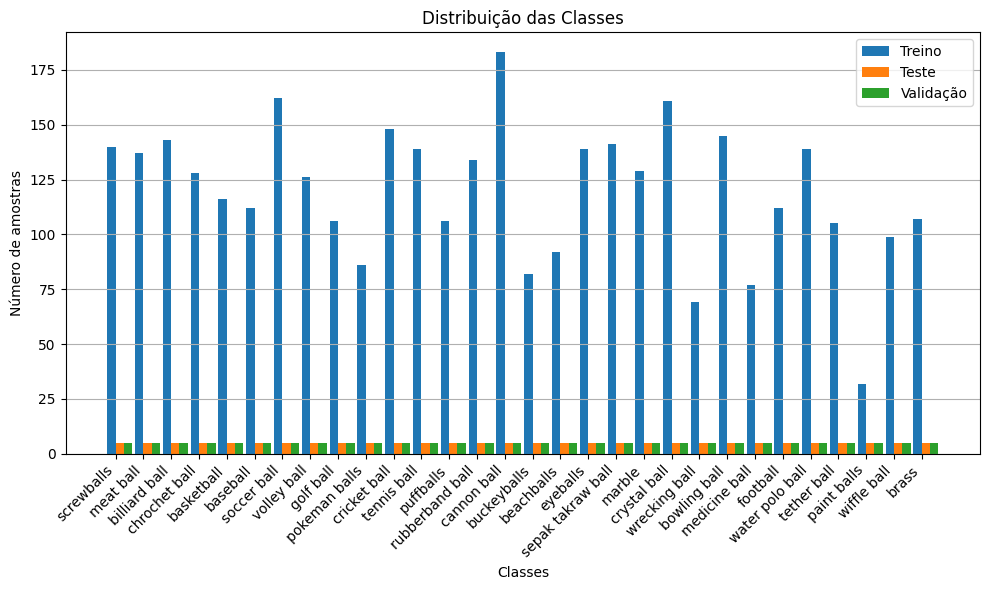

In [8]:
Plot_balance()

Percebemos que contém bastante imagens de treino, seguido das mesmas contidades para teste e validação.

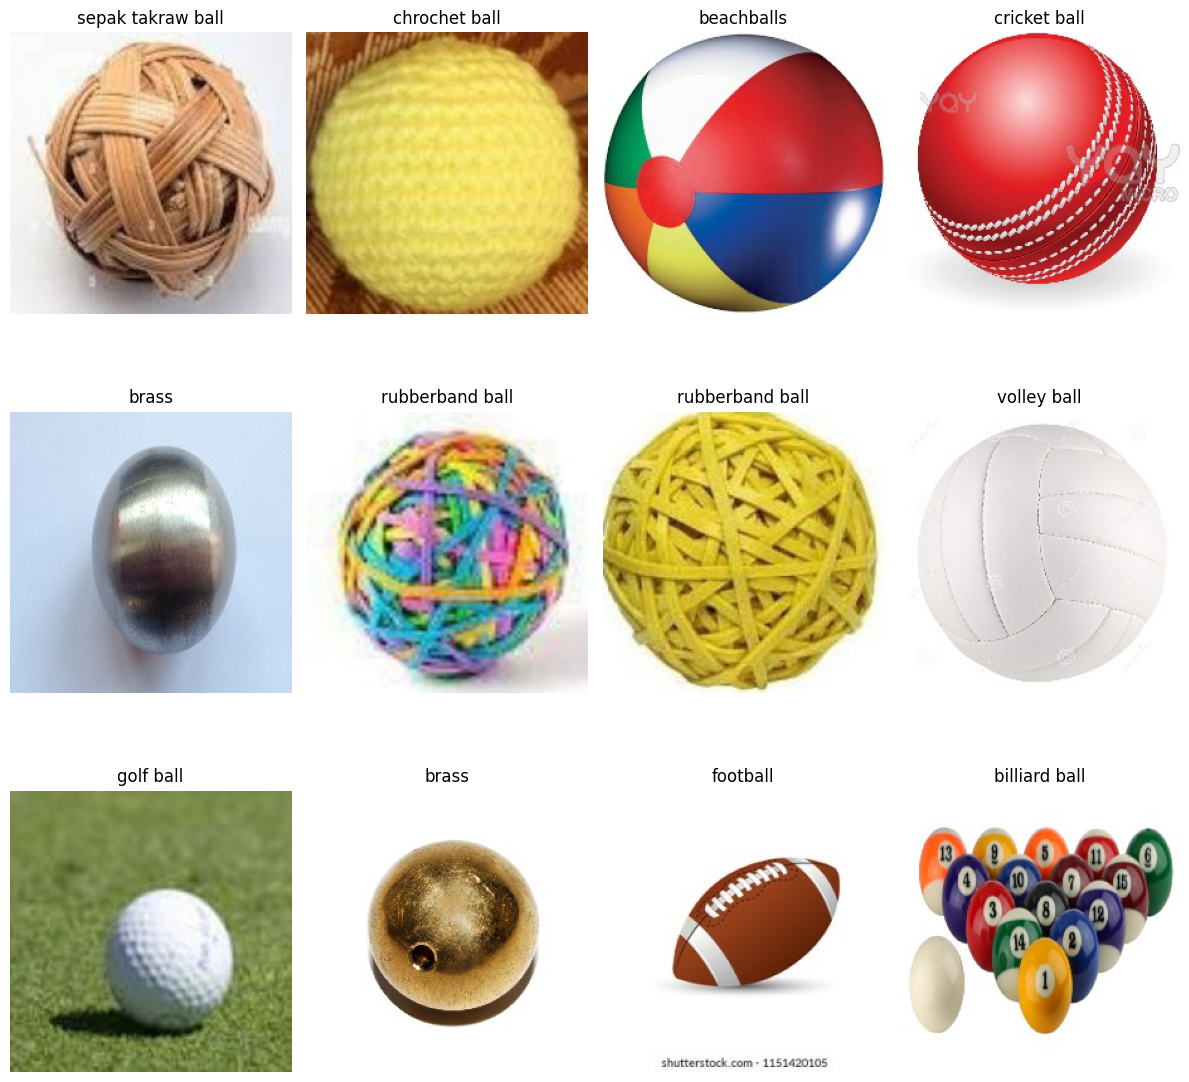

In [9]:
# Listar todos os arquivos de imagem dentro da pasta de treinamento e suas subpastas
image_files = []
for root, dirs, files in os.walk(train_path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(root, file))

if not image_files:
    print("Não há arquivos de imagem na pasta de treinamento.")
else:
    # Definir o tamanho da grade de subplot
    rows, cols = 3, 4

    # Criar uma figura com o tamanho adequado
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

    # Visualizar 12 imagens aleatórias
    for i, ax in enumerate(axes.ravel()):
        sample = np.random.choice(image_files)
        imagem_exemplo = mpimg.imread(sample)
        class_name = sample.split('/')[-2]

        ax.imshow(imagem_exemplo)
        ax.set_title(class_name, fontsize=12)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Pré-processamento de dados

Aqui definimos alguns parametros como batch size, numero de epocas e tamanho de imagens

In [10]:
batch_size = 128
num_epochs = 20
img_height = 224
img_width = 224
num_classes = count_classes(train_path)

In [11]:
train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255,
                                   shear_range=0.6,
                                   zoom_range=0.6,
                                   horizontal_flip=True,
                                   rotation_range=180)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=(img_height, img_width),
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   subset='training')

val_generator = train_datagen.flow_from_directory(train_path,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')

test_generator = test_datagen.flow_from_directory(train_path,
                                                 target_size=(img_height, img_width),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 2889 images belonging to 30 classes.
Found 706 images belonging to 30 classes.
Found 3595 images belonging to 30 classes.


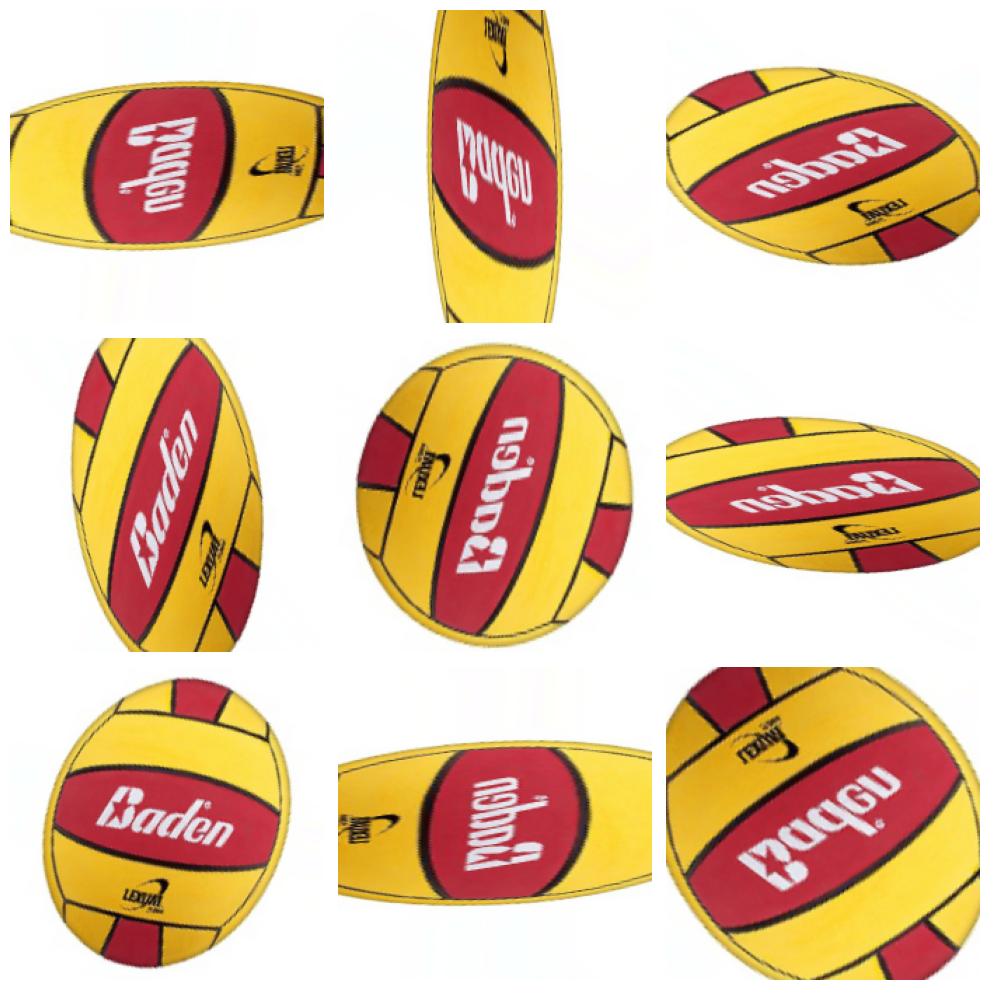

In [12]:
sample_batch = next(train_generator)

foto = sample_batch[0][0]
label = sample_batch[1][0]

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_datagen.random_transform(foto))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Criação do modelo

Nesta arquitetura de rede neural, estamos criando um modelo de classificação de imagens utilizando a biblioteca Keras. Vou explicar passo a passo cada parte da rede para facilitar o entendimento:

Camadas Convolucionais:

A primeira camada é uma camada de convolução com 32 filtros, cada um com uma janela de tamanho 3x3. Essa camada recebe a entrada da imagem com 3 canais de cor (RGB) e utiliza a função de ativação "relu", que ajuda a introduzir não-linearidades na rede.

Em seguida, temos uma camada de MaxPooling com janela de tamanho 2x2, que reduz o tamanho da representação da imagem pela metade. Essa camada ajuda a reduzir o número de parâmetros na rede e a extrair características importantes da imagem.

Depois, adicionamos mais uma camada de convolução com 64 filtros, cada um com janela de tamanho 3x3, também utilizando a função de ativação "relu".

Novamente, aplicamos uma camada de MaxPooling com janela de tamanho 2x2 para reduzir ainda mais o tamanho da representação da imagem.

Por fim, adicionamos uma terceira camada de convolução com 128 filtros e janela de tamanho 3x3, com a função de ativação "relu".

Camada de Flattening:

Após as camadas convolucionais, temos uma camada de "flattening" que transforma os mapas de características 2D em um vetor unidimensional, preparando a saída das camadas convolucionais para a entrada das camadas densas (totalmente conectadas).
Camadas Densas (Totalmente Conectadas):

Adicionamos uma camada densa com 128 neurônios e função de ativação "relu". Essa camada busca aprender padrões mais complexos nas características extraídas pelas camadas convolucionais.

Introduzimos uma camada de Dropout com taxa de 30%, que desativa aleatoriamente 30% dos neurônios durante o treinamento. Essa técnica ajuda a reduzir o overfitting, melhorando a generalização do modelo.

Em seguida, adicionamos mais uma camada densa com 32 neurônios e função de ativação "relu".

Finalmente, a última camada densa possui o número de neurônios igual ao número de classes do problema, usando a função de ativação "softmax". Essa camada fornece as probabilidades de pertencimento de cada imagem a cada classe, permitindo a classificação das imagens.

Compilação do Modelo:

Compilamos o modelo usando o otimizador "adam", que é um algoritmo eficiente de otimização para treinar redes neurais. Utilizamos a função de perda "categorical_crossentropy", apropriada para problemas de classificação com mais de duas classes.
Treinamento do Modelo:

Treinamos o modelo usando o conjunto de treinamento (train_generator) e o conjunto de validação (val_generator). Utilizamos o Early Stopping como um callback, o que nos permite interromper o treinamento se a performance no conjunto de validação não melhorar após algumas épocas, evitando o overfitting.
Avaliação do Modelo:

Avaliamos o modelo no conjunto de teste (test_generator) para obter a acurácia final do modelo nesse conjunto.

In [13]:
# Criando o modelo
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),  # Adicionando dropout com taxa de 30%
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(classes), activation='softmax')
])

# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Criando o callback para early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Treinando o modelo com early stopping
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=num_epochs,
                    callbacks=[early_stopping])

# Avaliando o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_generator)
print('Acurácia no conjunto de teste:', test_acc)

Epoch 1/20
23/23 [==============================] - 274s 12s/step - loss: 3.4697 - accuracy: 0.0495 - val_loss: 3.3067 - val_accuracy: 0.0751
Epoch 2/20
23/23 [==============================] - 286s 12s/step - loss: 3.2453 - accuracy: 0.0917 - val_loss: 3.1860 - val_accuracy: 0.1119
Epoch 3/20
23/23 [==============================] - 257s 11s/step - loss: 3.0653 - accuracy: 0.1558 - val_loss: 2.9238 - val_accuracy: 0.2280
Epoch 4/20
23/23 [==============================] - 264s 11s/step - loss: 2.8459 - accuracy: 0.2129 - val_loss: 2.7346 - val_accuracy: 0.2578
Epoch 5/20
23/23 [==============================] - 284s 12s/step - loss: 2.6346 - accuracy: 0.2648 - val_loss: 2.5960 - val_accuracy: 0.2705
Epoch 6/20
23/23 [==============================] - 272s 12s/step - loss: 2.5002 - accuracy: 0.3036 - val_loss: 2.4236 - val_accuracy: 0.3484
Epoch 7/20
23/23 [==============================] - 286s 12s/step - loss: 2.3199 - accuracy: 0.3486 - val_loss: 2.3923 - val_accuracy: 0.3428
Epoch 

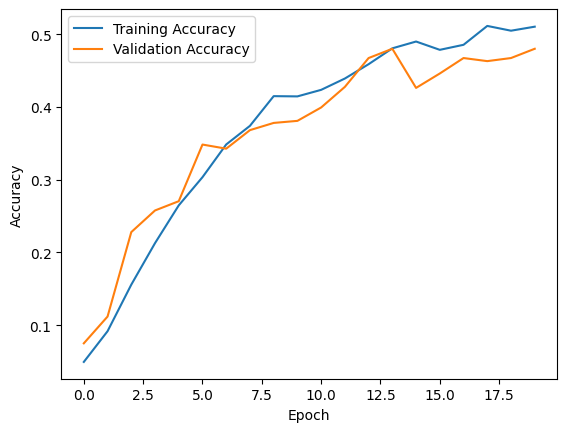

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

O codigo a baixo servirá para baixar o modelo treinado que obtive uma boa precisão.

In [18]:
def download_from_dropbox(dropbox_link, save_path):
    response = requests.get(dropbox_link)
    with open(save_path, 'wb') as file:
        file.write(response.content)

download_from_dropbox('https://www.dropbox.com/scl/fi/lwyouzyp58k0xxedg5udp/my_model_20230723_031110.h5?rlkey=npe5fnp7zcqy5skljpdyzf53v&dl=1', 'modeTrain.h5')

In [22]:
def save_model_with_date(model, save_dir='saved_models', model_name='model'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    now = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"{model_name}_{now}.h5"
    save_path = os.path.join(save_dir, model_filename)

    model.save(save_path)
    print(f"Model saved as {save_path}")

# Usage example:
# Assuming 'model' is your trained Keras model
save_model_with_date(model, save_dir='saved_models', model_name='my_model')

Model saved as saved_models/my_model_20230723_201802.h5


Após realizar o treinamento e carregar o modelo vamos fazer algumas predições:

In [34]:
# Carregando o modelo
model_path = "/content/modeTrain.h5"  # Selecionando o caminho do modelo já treinado
loaded_model = load_model(model_path)

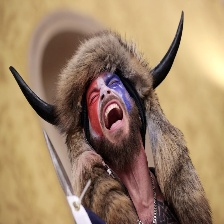

1/1 [==============================] - 1s 792ms/step
Label: screwballs
Previsão: baseball
Probabilidade: 0.2870632




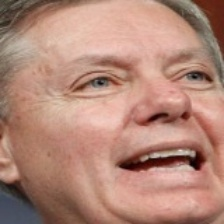

1/1 [==============================] - 0s 229ms/step
Label: screwballs
Previsão: screwballs
Probabilidade: 0.9985971




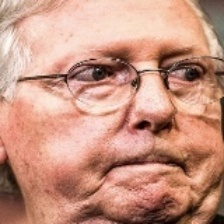

1/1 [==============================] - 0s 65ms/step
Label: screwballs
Previsão: screwballs
Probabilidade: 0.9424021




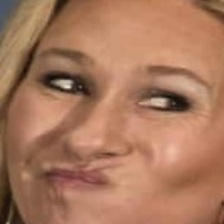

1/1 [==============================] - 0s 61ms/step
Label: screwballs
Previsão: screwballs
Probabilidade: 0.998197




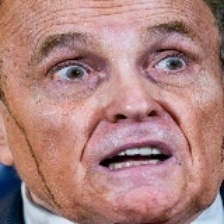

1/1 [==============================] - 0s 62ms/step
Label: screwballs
Previsão: screwballs
Probabilidade: 0.9847947




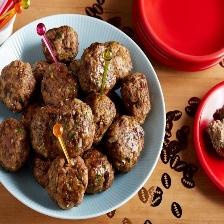

1/1 [==============================] - 0s 76ms/step
Label: meat ball
Previsão: meat ball
Probabilidade: 0.69915915




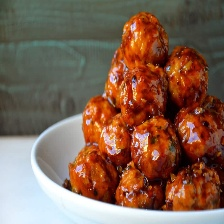

1/1 [==============================] - 0s 62ms/step
Label: meat ball
Previsão: meat ball
Probabilidade: 0.7569734




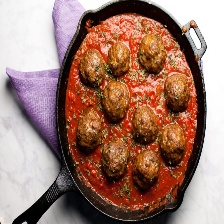

1/1 [==============================] - 0s 47ms/step
Label: meat ball
Previsão: meat ball
Probabilidade: 0.9187547




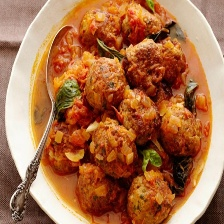

1/1 [==============================] - 0s 44ms/step
Label: meat ball
Previsão: meat ball
Probabilidade: 0.9940006




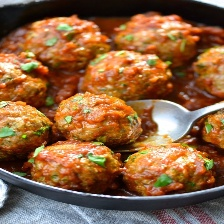

1/1 [==============================] - 0s 45ms/step
Label: meat ball
Previsão: meat ball
Probabilidade: 0.9833213




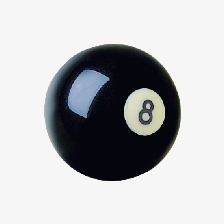

1/1 [==============================] - 0s 50ms/step
Label: billiard ball
Previsão: soccer ball
Probabilidade: 0.9753779




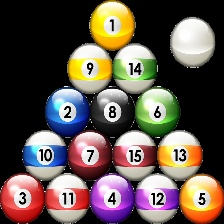

1/1 [==============================] - 0s 40ms/step
Label: billiard ball
Previsão: billiard ball
Probabilidade: 0.33238432




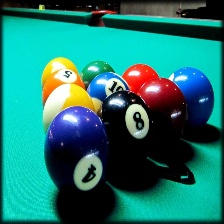

1/1 [==============================] - 0s 43ms/step
Label: billiard ball
Previsão: billiard ball
Probabilidade: 0.96314347




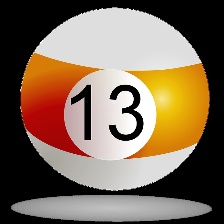

1/1 [==============================] - 0s 43ms/step
Label: billiard ball
Previsão: pokeman balls
Probabilidade: 0.59003204




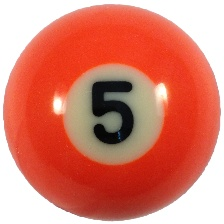

1/1 [==============================] - 1s 776ms/step
Label: billiard ball
Previsão: billiard ball
Probabilidade: 0.5859947




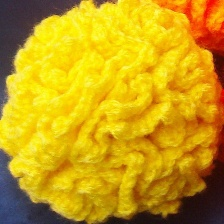

1/1 [==============================] - 0s 298ms/step
Label: chrochet ball
Previsão: sepak takraw ball
Probabilidade: 0.4154382




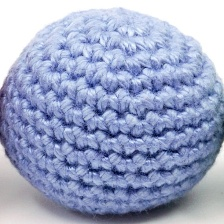

1/1 [==============================] - 0s 59ms/step
Label: chrochet ball
Previsão: chrochet ball
Probabilidade: 0.8538156




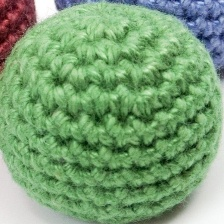

1/1 [==============================] - 0s 48ms/step
Label: chrochet ball
Previsão: rubberband ball
Probabilidade: 0.65140784




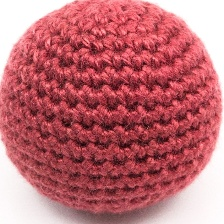

1/1 [==============================] - 0s 41ms/step
Label: chrochet ball
Previsão: meat ball
Probabilidade: 0.8371797




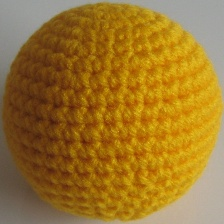

1/1 [==============================] - 0s 44ms/step
Label: chrochet ball
Previsão: sepak takraw ball
Probabilidade: 0.55525607




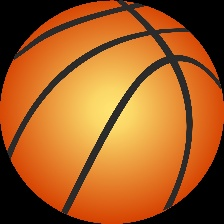

1/1 [==============================] - 0s 41ms/step
Label: basketball
Previsão: water polo ball
Probabilidade: 0.40413237




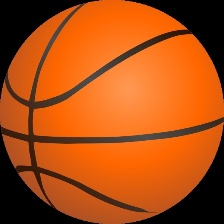

1/1 [==============================] - 0s 42ms/step
Label: basketball
Previsão: basketball
Probabilidade: 0.9910143




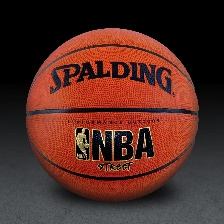

1/1 [==============================] - 0s 44ms/step
Label: basketball
Previsão: basketball
Probabilidade: 0.9964089




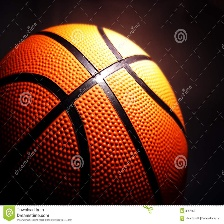

1/1 [==============================] - 0s 44ms/step
Label: basketball
Previsão: basketball
Probabilidade: 0.9447219




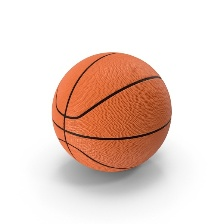

1/1 [==============================] - 0s 42ms/step
Label: basketball
Previsão: basketball
Probabilidade: 0.67110014




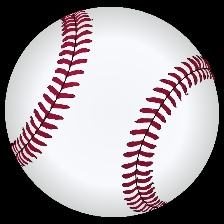

1/1 [==============================] - 0s 52ms/step
Label: baseball
Previsão: baseball
Probabilidade: 0.66384786




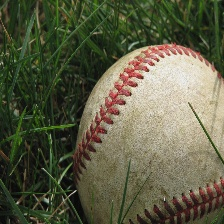

1/1 [==============================] - 0s 44ms/step
Label: baseball
Previsão: puffballs
Probabilidade: 0.96144086




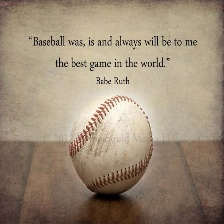

1/1 [==============================] - 0s 46ms/step
Label: baseball
Previsão: baseball
Probabilidade: 0.36720815




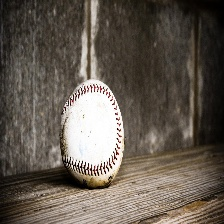

1/1 [==============================] - 0s 47ms/step
Label: baseball
Previsão: puffballs
Probabilidade: 0.6191527




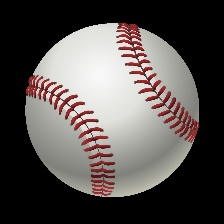

1/1 [==============================] - 0s 47ms/step
Label: baseball
Previsão: baseball
Probabilidade: 0.42733547




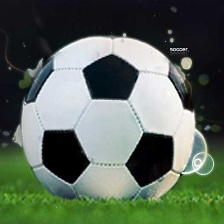

1/1 [==============================] - 1s 837ms/step
Label: soccer ball
Previsão: soccer ball
Probabilidade: 0.9919956




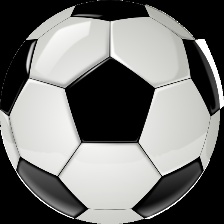

1/1 [==============================] - 0s 270ms/step
Label: soccer ball
Previsão: soccer ball
Probabilidade: 0.99983823




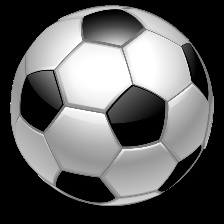

1/1 [==============================] - 0s 43ms/step
Label: soccer ball
Previsão: soccer ball
Probabilidade: 0.9904986




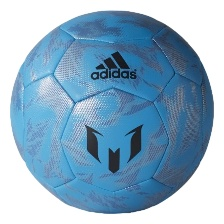

1/1 [==============================] - 0s 47ms/step
Label: soccer ball
Previsão: bowling ball
Probabilidade: 0.79350245




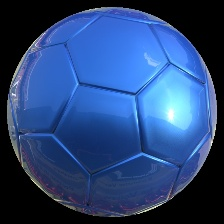

1/1 [==============================] - 0s 51ms/step
Label: soccer ball
Previsão: bowling ball
Probabilidade: 0.46331915




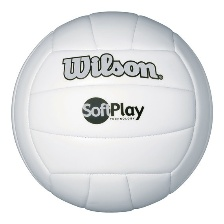

1/1 [==============================] - 0s 51ms/step
Label: volley ball
Previsão: medicine ball
Probabilidade: 0.24197985




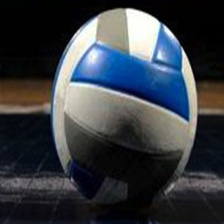

1/1 [==============================] - 0s 51ms/step
Label: volley ball
Previsão: volley ball
Probabilidade: 0.42938057




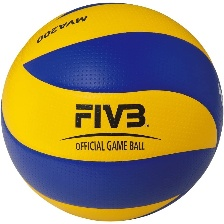

1/1 [==============================] - 0s 53ms/step
Label: volley ball
Previsão: volley ball
Probabilidade: 0.71845376




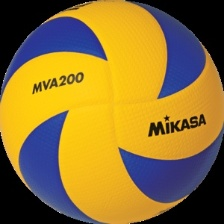

1/1 [==============================] - 0s 165ms/step
Label: volley ball
Previsão: volley ball
Probabilidade: 0.7885484




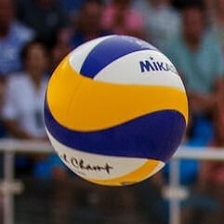

1/1 [==============================] - 0s 49ms/step
Label: volley ball
Previsão: volley ball
Probabilidade: 0.8720489




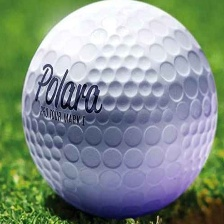

1/1 [==============================] - 1s 632ms/step
Label: golf ball
Previsão: golf ball
Probabilidade: 0.84472287




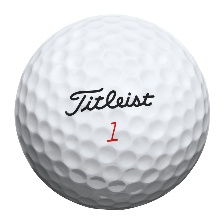

1/1 [==============================] - 0s 54ms/step
Label: golf ball
Previsão: medicine ball
Probabilidade: 0.43326485




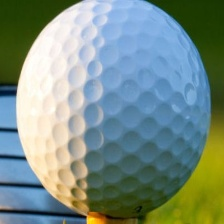

1/1 [==============================] - 0s 54ms/step
Label: golf ball
Previsão: golf ball
Probabilidade: 0.81865674




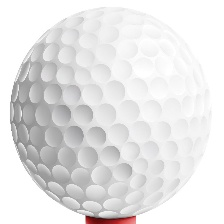

1/1 [==============================] - 0s 72ms/step
Label: golf ball
Previsão: golf ball
Probabilidade: 0.37274677




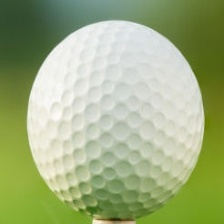

1/1 [==============================] - 0s 64ms/step
Label: golf ball
Previsão: golf ball
Probabilidade: 0.97767705




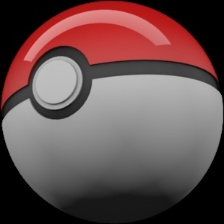

1/1 [==============================] - 0s 56ms/step
Label: pokeman balls
Previsão: crystal ball
Probabilidade: 0.3358446




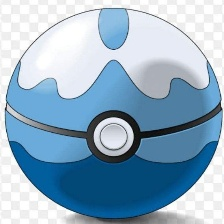

1/1 [==============================] - 0s 102ms/step
Label: pokeman balls
Previsão: pokeman balls
Probabilidade: 0.8281622




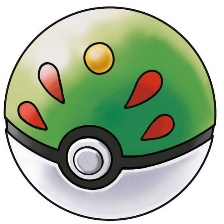

1/1 [==============================] - 1s 941ms/step
Label: pokeman balls
Previsão: soccer ball
Probabilidade: 0.4781457




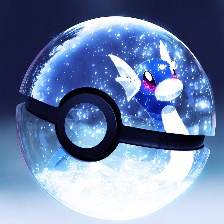

1/1 [==============================] - 1s 784ms/step
Label: pokeman balls
Previsão: pokeman balls
Probabilidade: 0.82113177




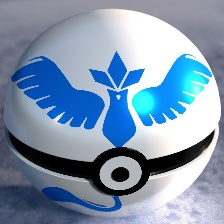

1/1 [==============================] - 0s 234ms/step
Label: pokeman balls
Previsão: soccer ball
Probabilidade: 0.31911397




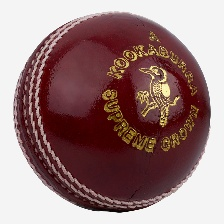

1/1 [==============================] - 0s 75ms/step
Label: cricket ball
Previsão: football
Probabilidade: 0.5484309




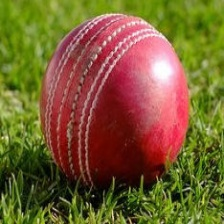

1/1 [==============================] - 0s 51ms/step
Label: cricket ball
Previsão: cricket ball
Probabilidade: 0.99432844




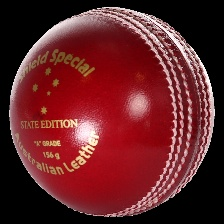

1/1 [==============================] - 0s 62ms/step
Label: cricket ball
Previsão: cricket ball
Probabilidade: 0.99912053




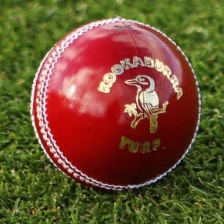

1/1 [==============================] - 0s 96ms/step
Label: cricket ball
Previsão: cricket ball
Probabilidade: 0.99605983




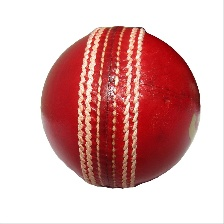

1/1 [==============================] - 0s 90ms/step
Label: cricket ball
Previsão: cricket ball
Probabilidade: 0.97252786




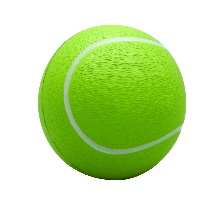

1/1 [==============================] - 1s 715ms/step
Label: tennis ball
Previsão: tennis ball
Probabilidade: 0.77255106




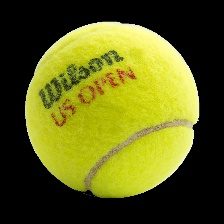

1/1 [==============================] - 0s 201ms/step
Label: tennis ball
Previsão: tennis ball
Probabilidade: 0.9353261




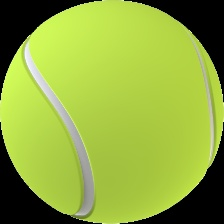

1/1 [==============================] - 0s 141ms/step
Label: tennis ball
Previsão: tennis ball
Probabilidade: 0.6424261




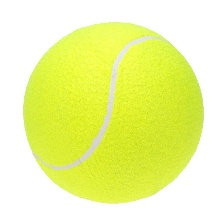

1/1 [==============================] - 0s 106ms/step
Label: tennis ball
Previsão: tennis ball
Probabilidade: 0.9574253




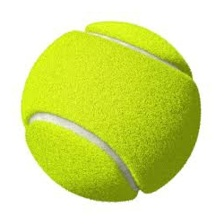

1/1 [==============================] - 0s 292ms/step
Label: tennis ball
Previsão: tennis ball
Probabilidade: 0.9739034




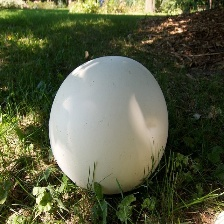

1/1 [==============================] - 1s 669ms/step
Label: puffballs
Previsão: puffballs
Probabilidade: 0.99186206




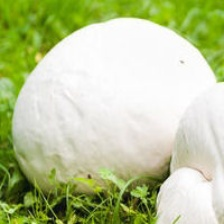

1/1 [==============================] - 0s 65ms/step
Label: puffballs
Previsão: golf ball
Probabilidade: 0.8614175




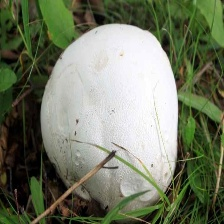

1/1 [==============================] - 0s 57ms/step
Label: puffballs
Previsão: puffballs
Probabilidade: 0.73893815




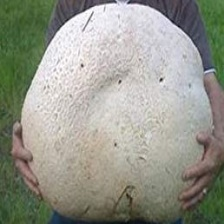

1/1 [==============================] - 0s 68ms/step
Label: puffballs
Previsão: puffballs
Probabilidade: 0.8129094




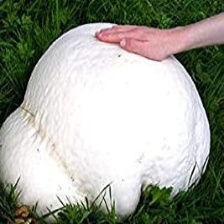

1/1 [==============================] - 0s 88ms/step
Label: puffballs
Previsão: puffballs
Probabilidade: 0.5026747




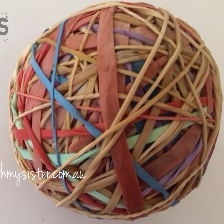

1/1 [==============================] - 0s 58ms/step
Label: rubberband ball
Previsão: rubberband ball
Probabilidade: 0.5046933




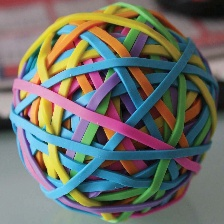

1/1 [==============================] - 0s 56ms/step
Label: rubberband ball
Previsão: rubberband ball
Probabilidade: 0.92313033




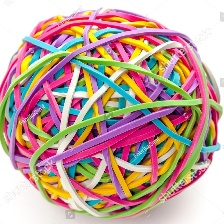

1/1 [==============================] - 0s 58ms/step
Label: rubberband ball
Previsão: rubberband ball
Probabilidade: 0.8821751




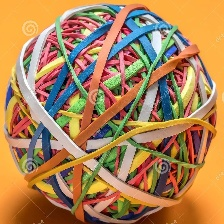

1/1 [==============================] - 1s 834ms/step
Label: rubberband ball
Previsão: marble
Probabilidade: 0.7545396




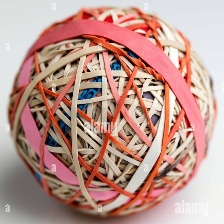

1/1 [==============================] - 0s 207ms/step
Label: rubberband ball
Previsão: football
Probabilidade: 0.6854151




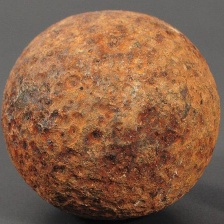

1/1 [==============================] - 0s 58ms/step
Label: cannon ball
Previsão: cannon ball
Probabilidade: 0.81475127




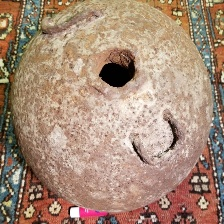

1/1 [==============================] - 0s 56ms/step
Label: cannon ball
Previsão: puffballs
Probabilidade: 0.9751848




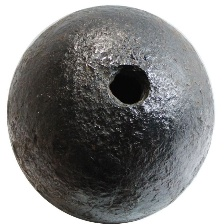

1/1 [==============================] - 0s 62ms/step
Label: cannon ball
Previsão: medicine ball
Probabilidade: 0.6309639




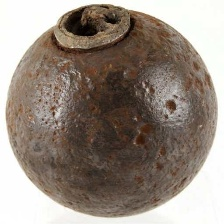

1/1 [==============================] - 0s 60ms/step
Label: cannon ball
Previsão: cannon ball
Probabilidade: 0.99706453




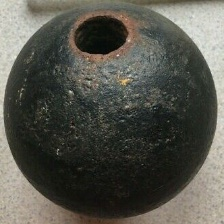

1/1 [==============================] - 0s 60ms/step
Label: cannon ball
Previsão: cannon ball
Probabilidade: 0.65900916




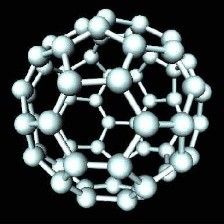

1/1 [==============================] - 0s 58ms/step
Label: buckeyballs
Previsão: buckeyballs
Probabilidade: 0.8585068




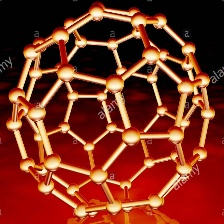

1/1 [==============================] - 0s 68ms/step
Label: buckeyballs
Previsão: buckeyballs
Probabilidade: 0.41882026




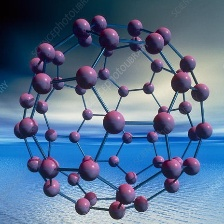

1/1 [==============================] - 0s 231ms/step
Label: buckeyballs
Previsão: buckeyballs
Probabilidade: 0.4059078




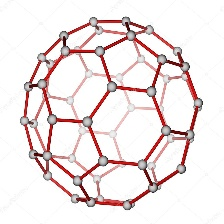

1/1 [==============================] - 0s 68ms/step
Label: buckeyballs
Previsão: buckeyballs
Probabilidade: 0.35358143




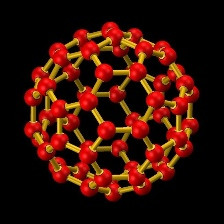

1/1 [==============================] - 0s 67ms/step
Label: buckeyballs
Previsão: basketball
Probabilidade: 0.8395932




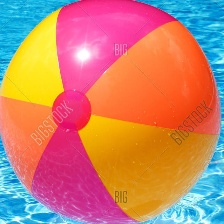

1/1 [==============================] - 0s 64ms/step
Label: beachballs
Previsão: beachballs
Probabilidade: 0.8503815




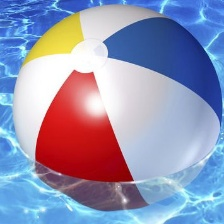

1/1 [==============================] - 0s 60ms/step
Label: beachballs
Previsão: beachballs
Probabilidade: 0.36949408




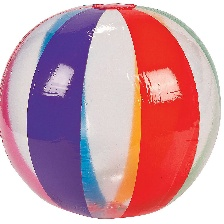

1/1 [==============================] - 0s 58ms/step
Label: beachballs
Previsão: beachballs
Probabilidade: 0.28426453




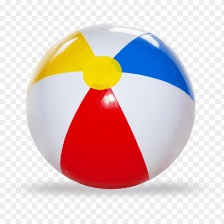

1/1 [==============================] - 0s 60ms/step
Label: beachballs
Previsão: beachballs
Probabilidade: 0.9070619




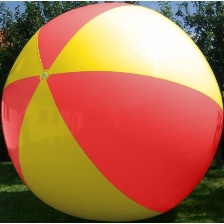

1/1 [==============================] - 0s 53ms/step
Label: beachballs
Previsão: beachballs
Probabilidade: 0.21729313




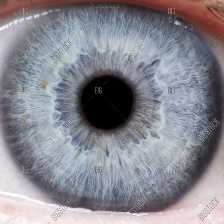

1/1 [==============================] - 0s 65ms/step
Label: eyeballs
Previsão: eyeballs
Probabilidade: 0.9976793




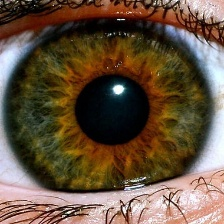

1/1 [==============================] - 0s 66ms/step
Label: eyeballs
Previsão: eyeballs
Probabilidade: 0.9945035




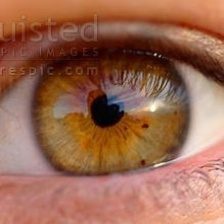

1/1 [==============================] - 0s 57ms/step
Label: eyeballs
Previsão: eyeballs
Probabilidade: 0.8573644




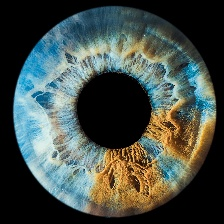

1/1 [==============================] - 0s 58ms/step
Label: eyeballs
Previsão: eyeballs
Probabilidade: 0.9613531




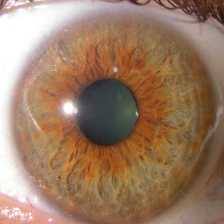

1/1 [==============================] - 0s 57ms/step
Label: eyeballs
Previsão: eyeballs
Probabilidade: 0.80697316




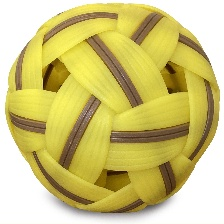

1/1 [==============================] - 0s 46ms/step
Label: sepak takraw ball
Previsão: sepak takraw ball
Probabilidade: 0.8837756




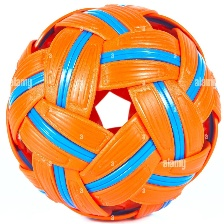

1/1 [==============================] - 1s 634ms/step
Label: sepak takraw ball
Previsão: basketball
Probabilidade: 0.6789896




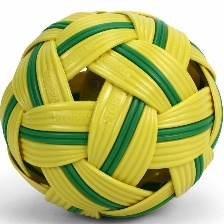

1/1 [==============================] - 0s 94ms/step
Label: sepak takraw ball
Previsão: sepak takraw ball
Probabilidade: 0.8217509




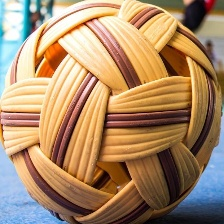

1/1 [==============================] - 1s 787ms/step
Label: sepak takraw ball
Previsão: sepak takraw ball
Probabilidade: 0.69803846




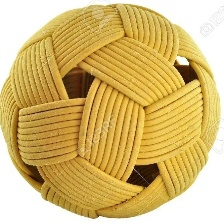

1/1 [==============================] - 0s 145ms/step
Label: sepak takraw ball
Previsão: sepak takraw ball
Probabilidade: 0.9297732




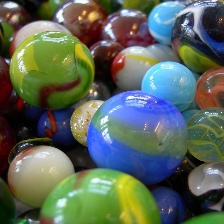

1/1 [==============================] - 0s 127ms/step
Label: marble
Previsão: marble
Probabilidade: 0.46970105




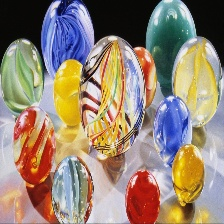

1/1 [==============================] - 0s 142ms/step
Label: marble
Previsão: meat ball
Probabilidade: 0.23586193




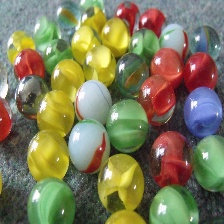

1/1 [==============================] - 0s 239ms/step
Label: marble
Previsão: marble
Probabilidade: 0.24190423




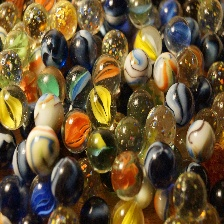

1/1 [==============================] - 0s 123ms/step
Label: marble
Previsão: marble
Probabilidade: 0.37294546




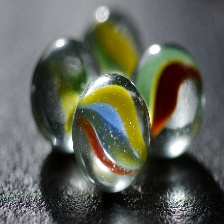

1/1 [==============================] - 0s 110ms/step
Label: marble
Previsão: marble
Probabilidade: 0.48813125




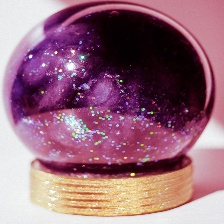

1/1 [==============================] - 0s 150ms/step
Label: crystal ball
Previsão: bowling ball
Probabilidade: 0.18137881




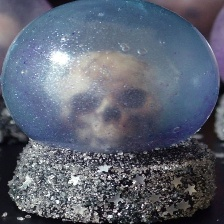

1/1 [==============================] - 1s 895ms/step
Label: crystal ball
Previsão: crystal ball
Probabilidade: 0.42880067




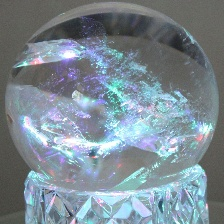

1/1 [==============================] - 0s 285ms/step
Label: crystal ball
Previsão: chrochet ball
Probabilidade: 0.3245024




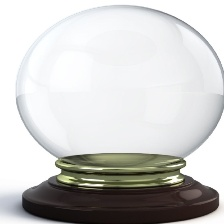

1/1 [==============================] - 0s 60ms/step
Label: crystal ball
Previsão: golf ball
Probabilidade: 0.27503574




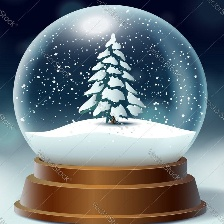

1/1 [==============================] - 0s 56ms/step
Label: crystal ball
Previsão: pokeman balls
Probabilidade: 0.2170691




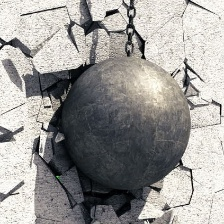

1/1 [==============================] - 0s 58ms/step
Label: wrecking ball
Previsão: crystal ball
Probabilidade: 0.24520795




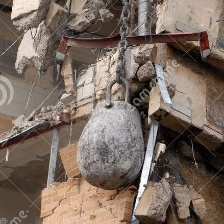

1/1 [==============================] - 0s 63ms/step
Label: wrecking ball
Previsão: puffballs
Probabilidade: 0.36958662




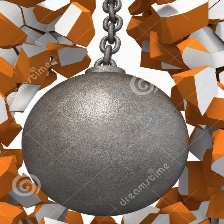

1/1 [==============================] - 0s 55ms/step
Label: wrecking ball
Previsão: wrecking ball
Probabilidade: 0.30381605




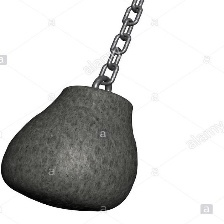

1/1 [==============================] - 0s 230ms/step
Label: wrecking ball
Previsão: soccer ball
Probabilidade: 0.4709542




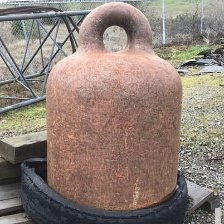

1/1 [==============================] - 0s 56ms/step
Label: wrecking ball
Previsão: puffballs
Probabilidade: 0.66801137




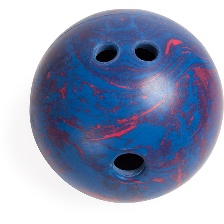

1/1 [==============================] - 0s 73ms/step
Label: bowling ball
Previsão: bowling ball
Probabilidade: 0.89182967




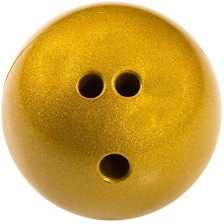

1/1 [==============================] - 0s 57ms/step
Label: bowling ball
Previsão: water polo ball
Probabilidade: 0.30425996




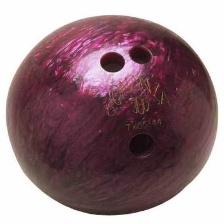

1/1 [==============================] - 0s 59ms/step
Label: bowling ball
Previsão: cannon ball
Probabilidade: 0.44949293




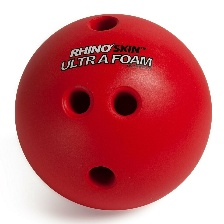

1/1 [==============================] - 0s 73ms/step
Label: bowling ball
Previsão: cricket ball
Probabilidade: 0.3187889




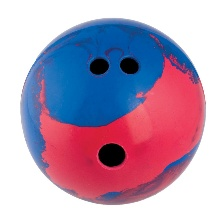

1/1 [==============================] - 0s 61ms/step
Label: bowling ball
Previsão: bowling ball
Probabilidade: 0.5996961




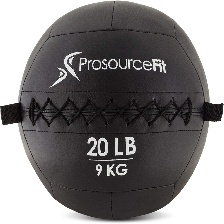

1/1 [==============================] - 0s 68ms/step
Label: medicine ball
Previsão: medicine ball
Probabilidade: 0.97951126




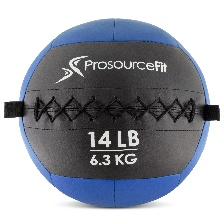

1/1 [==============================] - 1s 808ms/step
Label: medicine ball
Previsão: medicine ball
Probabilidade: 0.84291625




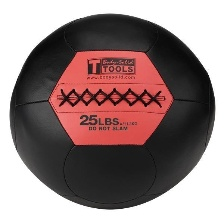

1/1 [==============================] - 1s 709ms/step
Label: medicine ball
Previsão: medicine ball
Probabilidade: 0.71523285




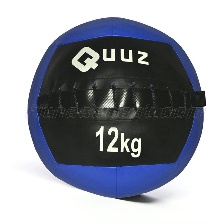

1/1 [==============================] - 0s 225ms/step
Label: medicine ball
Previsão: medicine ball
Probabilidade: 0.95800436




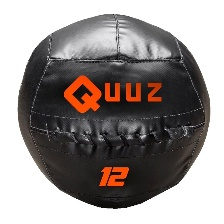

1/1 [==============================] - 0s 59ms/step
Label: medicine ball
Previsão: medicine ball
Probabilidade: 0.5437244




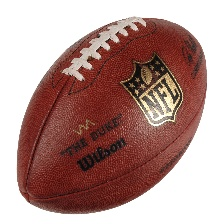

1/1 [==============================] - 0s 81ms/step
Label: football
Previsão: football
Probabilidade: 0.9790173




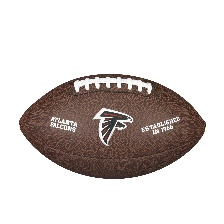

1/1 [==============================] - 0s 62ms/step
Label: football
Previsão: football
Probabilidade: 0.9944617




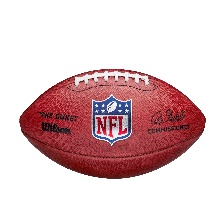

1/1 [==============================] - 0s 64ms/step
Label: football
Previsão: football
Probabilidade: 0.99499005




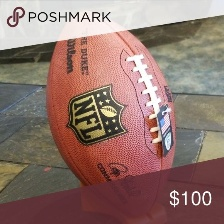

1/1 [==============================] - 0s 62ms/step
Label: football
Previsão: football
Probabilidade: 0.9767189




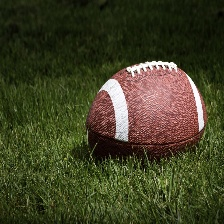

1/1 [==============================] - 0s 214ms/step
Label: football
Previsão: puffballs
Probabilidade: 0.78827655




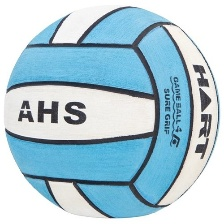

1/1 [==============================] - 0s 63ms/step
Label: water polo ball
Previsão: buckeyballs
Probabilidade: 0.51109993




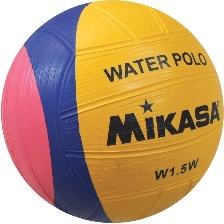

1/1 [==============================] - 1s 702ms/step
Label: water polo ball
Previsão: water polo ball
Probabilidade: 0.66149527




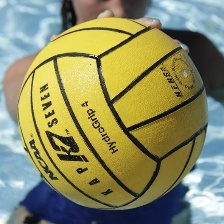

1/1 [==============================] - 0s 73ms/step
Label: water polo ball
Previsão: water polo ball
Probabilidade: 0.60368997




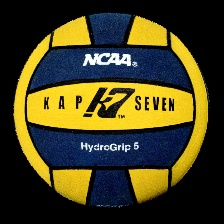

1/1 [==============================] - 0s 64ms/step
Label: water polo ball
Previsão: water polo ball
Probabilidade: 0.9497824




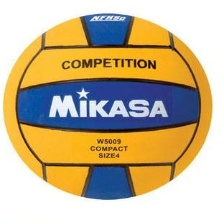

1/1 [==============================] - 1s 683ms/step
Label: water polo ball
Previsão: water polo ball
Probabilidade: 0.90560734




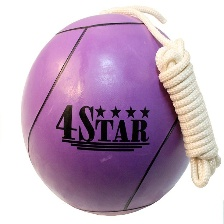

1/1 [==============================] - 0s 74ms/step
Label: tether ball
Previsão: bowling ball
Probabilidade: 0.16909184




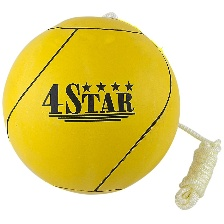

1/1 [==============================] - 0s 61ms/step
Label: tether ball
Previsão: tether ball
Probabilidade: 0.5303982




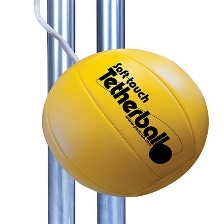

1/1 [==============================] - 1s 636ms/step
Label: tether ball
Previsão: tether ball
Probabilidade: 0.78629833




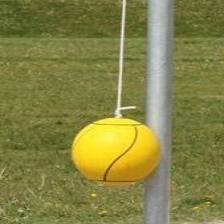

1/1 [==============================] - 0s 63ms/step
Label: tether ball
Previsão: tether ball
Probabilidade: 0.33722752




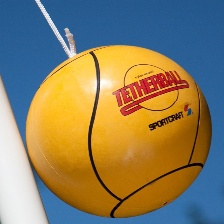

1/1 [==============================] - 0s 59ms/step
Label: tether ball
Previsão: water polo ball
Probabilidade: 0.8704766




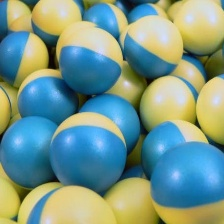

1/1 [==============================] - 1s 721ms/step
Label: paint balls
Previsão: paint balls
Probabilidade: 0.57161707




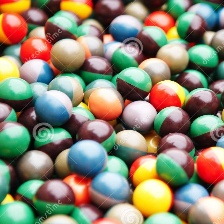

1/1 [==============================] - 0s 108ms/step
Label: paint balls
Previsão: marble
Probabilidade: 0.65943664




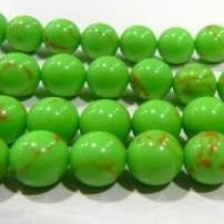

1/1 [==============================] - 0s 101ms/step
Label: paint balls
Previsão: paint balls
Probabilidade: 0.7979915




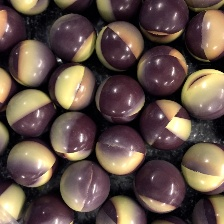

1/1 [==============================] - 0s 93ms/step
Label: paint balls
Previsão: screwballs
Probabilidade: 0.22820874




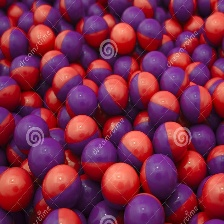

1/1 [==============================] - 0s 114ms/step
Label: paint balls
Previsão: basketball
Probabilidade: 0.29094484




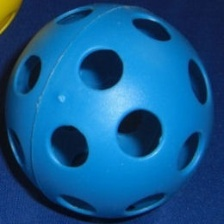

1/1 [==============================] - 0s 58ms/step
Label: wiffle ball
Previsão: pokeman balls
Probabilidade: 0.34319484




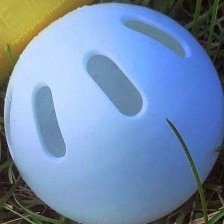

1/1 [==============================] - 0s 212ms/step
Label: wiffle ball
Previsão: golf ball
Probabilidade: 0.41984805




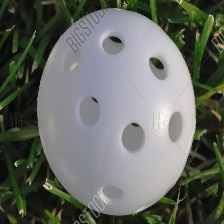

1/1 [==============================] - 0s 57ms/step
Label: wiffle ball
Previsão: puffballs
Probabilidade: 0.83092135




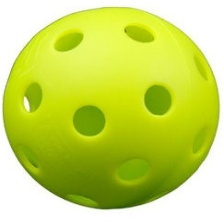

1/1 [==============================] - 0s 56ms/step
Label: wiffle ball
Previsão: tennis ball
Probabilidade: 0.79990846




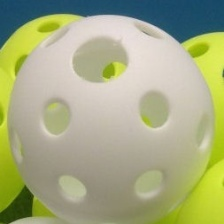

1/1 [==============================] - 0s 64ms/step
Label: wiffle ball
Previsão: golf ball
Probabilidade: 0.9538103




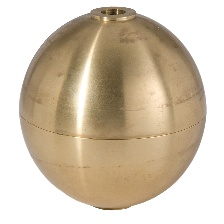

1/1 [==============================] - 0s 61ms/step
Label: brass
Previsão: brass
Probabilidade: 0.8002428




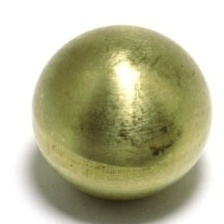

1/1 [==============================] - 0s 99ms/step
Label: brass
Previsão: chrochet ball
Probabilidade: 0.24444503




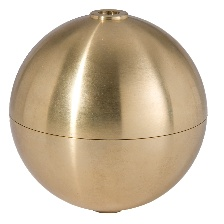

1/1 [==============================] - 0s 261ms/step
Label: brass
Previsão: brass
Probabilidade: 0.8365683




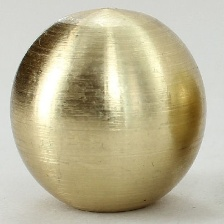

1/1 [==============================] - 0s 61ms/step
Label: brass
Previsão: sepak takraw ball
Probabilidade: 0.39705843




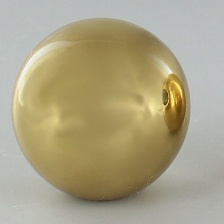

1/1 [==============================] - 0s 59ms/step
Label: brass
Previsão: brass
Probabilidade: 0.53970873




In [38]:
parent_dir = '/content/Dataset/30-TypesOfBalls/valid'
class_names = sorted(os.listdir(parent_dir))
count_images = 0
y_pred = list()
y_true = list()

# Percorrendo a pasta onde estão salvas as imagens de teste
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        if file.endswith('.png') or file.endswith('.jpg'):
            count_images+=1
            label = subdir.split('/')[-1]  # Obtendo o nome da pasta que é o label
            y_true.append(label)

            img_path = os.path.join(subdir, file)
            display(ipimg(filename=img_path, width=300))

            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = x.astype('float32') / 255.0

            # Previsão
            prediction = loaded_model.predict(x)

            # Printando as saídas do modelo
            predicted_class = np.argmax(prediction[0])
            probability = prediction[0][predicted_class]
            y_pred.append(class_names[predicted_class])
            print("Label:", label)
            print("Previsão:", class_names[predicted_class])
            print("Probabilidade:", probability)
            print("\n")

# Conclúsão

Após avaliar os resultados obtidos com o modelo de classificação, notamos que ele apresentou um desempenho geralmente bom. No entanto, em alguns casos, o modelo comete erros na previsão do tipo de bola, mas esses erros ocorrem com baixa probabilidade de ocorrência. É importante ressaltar que a tolerância a erros pode variar de acordo com o contexto do problema sendo abordado.

Em um cenário profissional, é comum estabelecer um limite de confiança para as predições aceitas. Por exemplo, poderíamos definir que apenas as predições com probabilidade acima de 70% seriam consideradas válidas. Essa escolha dependeria da natureza específica do problema e das consequências dos erros de classificação.

Estabelecer um limite de confiança pode ser útil para evitar situações em que o modelo faz predições com baixa certeza, o que pode ser arriscado em aplicações críticas. No entanto, é importante equilibrar a taxa de acertos com a taxa de rejeição de predições, pois um limite muito alto pode levar à perda de informações valiosas em alguns casos.